In [6]:
# reuters 데이터셋 다뤄보기
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


In [7]:
# 데이터셋 전처리 과정
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

500


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [9]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 20, 
                    validation_split = 0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 79s 320ms/step - acc: 0.3445 - loss: 2.8380 - val_acc: 0.4736 - val_loss: 2.1349
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 72s 319ms/step - acc: 0.4810 - loss: 2.0832 - val_acc: 0.4936 - val_loss: 1.8893
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 70s 313ms/step - acc: 0.5113 - loss: 1.8485 - val_acc: 0.5248 - val_loss: 1.7850
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 70s 309ms/step - acc: 0.5295 - loss: 1.7725 - val_acc: 0.5520 - val_loss: 1.7323
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 67s 298ms/step - acc: 0.5356 - loss: 1.7046 - val_acc: 0.5415 - val_loss: 1.7286
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 72s 321ms/step - acc: 0.5703 - loss: 1.6248 - val_acc: 0.5648 - val_loss: 1.6726
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 325ms/step - acc: 0.5934 - loss: 1.5662 - val_acc: 0.5671 - val_loss: 1.6773
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 72s 320ms/step - acc: 0.6124 - loss: 1.4911 - val_acc: 0.5838 - val_loss: 1.6318
Epoch 9/20
225/225 ━━━━━━━━━━━━━

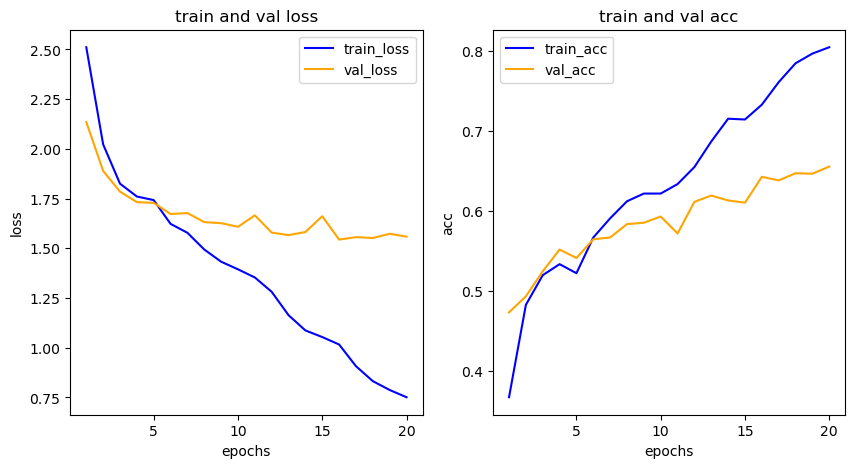

In [12]:
# 학습과정 그리기
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()